Pre-process:

1) Remove duplicates

2) Solve Missings

    - doesn't exist vs not recorded
    
    - how many?
    
    - remove or impute (Iterative or KNN)
    
3) Remove outliers

    - noise or different
    
    - how many?
    
    - remove or impute (Iterative or KNN)

4) Remove columns or Dimension reduction

    - remove highly correlated or small importance
    
    - projection: PCA
   
    - manifold learning: TSNE
           
5) Add columns
                    
    - combine features like ratios
    
    - polynomial
    
    - One-hot encoding
          
6) Remove rows:

    - unbalanced data
    
    - sample to check things faster
    
7) Add rows:

    - unbalanced data

8) Transforming
    
    - log, sqrt, ...
    
    - Standard scaler, MinMax scaler, L2 scaler
        
    - Ordinal encoding

In [105]:
from pandas import DataFrame


df = DataFrame(data=[[2020, 1.5],
                     [2020, 1.7],
                     [2019, 1.9]],
               index=['iran', 'usa', 'japan'],
               columns=['year', 'pop'])

In [18]:
df.loc['iran']

year    2020.0
pop        1.5
Name: iran, dtype: float64

In [19]:
df.iloc[0]

year    2020.0
pop        1.5
Name: iran, dtype: float64

In [20]:
df.iloc[:,1]

iran     1.5
usa      1.7
japan    1.9
Name: pop, dtype: float64

In [21]:
df.columns

Index(['year', 'pop'], dtype='object')

In [22]:
df.values

array([[2.020e+03, 1.500e+00],
       [2.020e+03, 1.700e+00],
       [2.019e+03, 1.900e+00]])

In [23]:
df.year.value_counts()

2020    2
2019    1
Name: year, dtype: int64

In [24]:
# df.drop(0, inplace=True)
# df.drop('pop', axis=1, inplace=True)

In [25]:
df[0:3]

,year,pop
iran,2020,1.5
usa,2020,1.7
japan,2019,1.9


In [26]:
df[df.year > 2019]

,year,pop
iran,2020,1.5
usa,2020,1.7


In [27]:
df[(df.year > 2019) & (df['pop'] == 1.5)]

,year,pop
iran,2020,1.5


In [28]:
df[['pop','year']]

,pop,year
iran,1.5,2020
usa,1.7,2020
japan,1.9,2019


In [29]:
df.loc[df['year'] > 2019, ['pop','year']]

,pop,year
iran,1.5,2020
usa,1.7,2020


In [30]:
df[df['year'].isin([2019, 202])]

,year,pop
japan,2019,1.9


In [31]:
df.duplicated()
# df.drop_duplicates(['year', 'pop'], keep='last')

iran     False
usa      False
japan    False
dtype: bool

In [32]:
df.year.replace({2019: 19, 2020: 20}, inplace=True) # for order encode

In [33]:
df.iat[0, 1] = 1
df

,year,pop
iran,20,1.0
usa,20,1.7
japan,19,1.9


In [34]:
df.at['iran', 'year'] = 1
df

,year,pop
iran,1,1.0
usa,20,1.7
japan,19,1.9


In [35]:
df.mean()

year    13.333333
pop      1.533333
dtype: float64

In [106]:
df.sort_values(by='year')

,year,pop
japan,2019,1.9
iran,2020,1.5
usa,2020,1.7


In [36]:
df.head()

,year,pop
iran,1,1.0
usa,20,1.7
japan,19,1.9


In [37]:
df.tail(1)

,year,pop
japan,19,1.9


In [38]:
from pandas import concat

df1 = DataFrame([['a', 1],
                ['b', 2]])
df2 = DataFrame([['c', 1],
                ['d', 2]])

In [39]:
concat([df1,df2])

,0,1
0,a,1
1,b,2
0,c,1
1,d,2


In [40]:
df3 = DataFrame([[True], [False]])
concat([df1,df3], axis=1)

,0,1,0
0,a,1,True
1,b,2,False


In [42]:
from pandas import read_csv
# df = read_csv('file.csv')

In [43]:
from pandas import DataFrame, get_dummies

df = DataFrame([['Teh', 2],
                ['Qom', 4],
                ['Teh', 6],
                ['Tab', 6],], 
               columns=['city', 'some_value'])

one_hot = get_dummies(df['city'])
df = df.drop('city', axis=1)
df = df.join(one_hot)
df

,some_value,Qom,Tab,Teh
0,2,0,0,1
1,4,1,0,0
2,6,0,0,1
3,6,0,1,0


In [44]:

df = DataFrame([['Teh', 2],
                ['Qom', 4],
                ['Teh', 6],
                ['Tab', 6],], 
               columns=['city', 'some_value'])

one_hot = get_dummies(df['city'], drop_first=True)
df = df.drop('city', axis=1)
df = df.join(one_hot)
df

,some_value,Tab,Teh
0,2,0,1
1,4,0,0
2,6,0,1
3,6,1,0


In [45]:
df.to_numpy()

array([[2, 0, 1],
       [4, 0, 0],
       [6, 0, 1],
       [6, 1, 0]])

In [46]:
df.describe()

,some_value,Tab,Teh
count,4.000000,4.00,4.00000
mean,4.500000,0.25,0.50000
std,1.914854,0.50,0.57735
min,2.000000,0.00,0.00000
25%,3.500000,0.00,0.00000
50%,5.000000,0.00,0.50000
75%,6.000000,0.25,1.00000
max,6.000000,1.00,1.00000


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   some_value  4 non-null      int64
 1   Tab         4 non-null      uint8
 2   Teh         4 non-null      uint8
dtypes: int64(1), uint8(2)
memory usage: 168.0 bytes


In [48]:
for index, row in df.iterrows():
    print(row)

some_value    2
Tab           0
Teh           1
Name: 0, dtype: int64
some_value    4
Tab           0
Teh           0
Name: 1, dtype: int64
some_value    6
Tab           0
Teh           1
Name: 2, dtype: int64
some_value    6
Tab           1
Teh           0
Name: 3, dtype: int64


In [49]:
df = DataFrame([[None, 2],
                ['Tab', 4],
                ['Teh', None]], 
               columns=['city', 'some_value'])

In [51]:
df.isna().sum()

city          1
some_value    1
dtype: int64

In [ ]:
df.dropna(how='any', inplace=True)
df

In [114]:
df[df.notnull()]

,year,pop
iran,2020,1.5
usa,2020,1.7
japan,2019,1.9


In [52]:
df = DataFrame([['Teh', 2],
                ['Tab', 4],
                ['Teh', 6]], 
               columns=['city', 'some_value'])
df.groupby('city').mean()

,some_value
city,
Tab,4.0
Teh,4.0


In [53]:
from sklearn.preprocessing import scale, minmax_scale
from math import nan
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [54]:
X_train = [[1, 2], [3, 4]]
scale(X_train) # x - avg / std -> avg wil be 0

array([[-1., -1.],
       [ 1.,  1.]])

In [55]:
minmax_scale(X_train)

array([[0., 0.],
       [1., 1.]])

In [56]:
imp = IterativeImputer(max_iter=10, random_state=0, missing_values=nan)
imp.fit([[1, 2], [3, 6], [4, 8], [nan, 3], [7, nan]])
X_test = [[nan, 2], [6, nan], [nan, 6]]
print(imp.transform(X_test).round(2))

[[ 1.  2.]
 [ 6. 12.]
 [ 3.  6.]]


In [57]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

pca = PCA(n_components=2)
pca.fit_transform(load_iris().data)

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [58]:
from sklearn.ensemble import IsolationForest
# IsolationForest,  OneClassSVM, EllipticEnvelope,  LocalOutlierFactor
X = [[-1.1], [0.3], [0.5], [100]]
clf = IsolationForest().fit(X)
clf.predict(X)

array([ 1,  1,  1, -1])

In [60]:
from pandas import DataFrame
df = DataFrame([[1, 2, 3],
                [4, 5, 6],
                [7, 8, 9]])
f = lambda x: (x - x.min()) / (x.max() - x.min())
df.apply(f) # column-wise to all columns

,0,1,2
0,0.0,0.0,0.0
1,0.5,0.5,0.5
2,1.0,1.0,1.0


In [61]:
df.iloc[:,0].map(lambda x: 1 / x) # element-wise to one column

0    1.000000
1    0.250000
2    0.142857
Name: 0, dtype: float64

In [62]:
df.applymap(lambda x: 1 / x) # element-wise to all cells

,0,1,2
0,1.000000,0.500,0.333333
1,0.250000,0.200,0.166667
2,0.142857,0.125,0.111111


In [63]:
df.where(df > 2, -1)
# where(cond, other=nan, inplace=False) 
# Replace values where the condition is False.

,0,1,2
0,-1,-1,3
1,4,5,6
2,7,8,9


<BarContainer object of 30 artists>

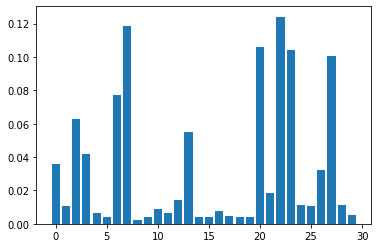

In [97]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.datasets import load_breast_cancer as load
from sklearn.ensemble import RandomForestClassifier
from matplotlib.pyplot import bar

X = load().data
y = load().target
my_model = RandomForestClassifier(n_estimators=100)
my_model.fit(X, y)
my_model.feature_importances_.round(2)
bar(range(X.shape[1]), my_model.feature_importances_)

<BarContainer object of 30 artists>

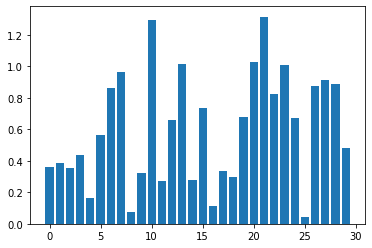

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale
from numpy import abs
model = LogisticRegression()
model.fit(scale(X), y)

bar(range(X.shape[1]), abs(model.coef_[0]))

In [112]:
import numpy as np
from sklearn.impute import KNNImputer
nan = np.nan
X = np.array([[1, 2, nan], [3, 4, 3], [nan, 6, 5], [8, 8, 7]])
imputer = KNNImputer(n_neighbors=1, weights="uniform")
imputer.fit_transform(X)

array([[1., 2., 3.],
       [3., 4., 3.],
       [3., 6., 5.],
       [8., 8., 7.]])

In [ ]:
more advanced stuff: agg, merge, pivot, melt